## Creating DataSet

### Reading Input Data

In [1]:
#package imports

import numpy as np

from numpy import genfromtxt

import time

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import pandas as pd
from pandas import unique

from joblib import Parallel, delayed
import multiprocessing

from random import shuffle
import math 
import time

from sklearn.preprocessing import StandardScaler



In [2]:
old_sal = pd.read_csv("kaggle_survey_2020_responses.csv", low_memory = False)

In [3]:
Salaries = pd.read_csv("kaggle_survey_2020_responses.csv", low_memory = False)
Salaries.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping rows with the missing target variable (Q24)

In [4]:
Salaries.dropna(subset=['Q24'],inplace=True) 

In [5]:
Salaries.Q24.unique() 

array(['What is your current yearly compensation (approximate $USD)?',
       '100,000-124,999', '15,000-19,999', '125,000-149,999',
       '70,000-79,999', '30,000-39,999', '90,000-99,999', '1,000-1,999',
       '$0-999', '10,000-14,999', '150,000-199,999', '60,000-69,999',
       '4,000-4,999', '> $500,000', '300,000-500,000', '40,000-49,999',
       '25,000-29,999', '80,000-89,999', '7,500-9,999', '50,000-59,999',
       '250,000-299,999', '5,000-7,499', '2,000-2,999', '20,000-24,999',
       '200,000-249,999', '3,000-3,999'], dtype=object)

### Combining the salary buckets and label encoding them

In [6]:
salary_buckets = {   '$0-999': '0-9,999',
    '1,000-1,999': '0-9,999',
    '2,000-2,999': '0-9,999', 
    '3,000-3,999': '0-9,999',
    '4,000-4,999': '0-9,999',
    '5,000-7,499': '0-9,999', 
    '7,500-9,999': '0-9,999',
    '10,000-14,999': '10,000-19,999',
    '15,000-19,999': '10,000-19,999', 
    '20,000-24,999': '20,000-29,999',
    '25,000-29,999': '20,000-29,999',
    '30,000-39,999': '30,000-39,999', 
    '40,000-49,999': '40,000-49,999', 
    '50,000-59,999': '50,000-59,999',
    '60,000-69,999': '60,000-69,999',
    '70,000-79,999': '70,000-79,999', 
    '80,000-89,999': '80,000-89,999', 
    '90,000-99,999': '90,000-99,999',
    '100,000-124,999':'100,000-124,999',
    '125,000-149,999':'125,000-149,999',
    '150,000-199,999':'150,000-199,999',
    '200,000-249,999':'200,000-249,999',
    '250,000-299,999':'>250,000',
    '300,000-500,000':'>250,000',
    '> $500,000':'>250,000'}

In [7]:
salary_encode = {   '$0-999': 0,
    '1,000-1,999': 0,
    '2,000-2,999': 0, 
    '3,000-3,999': 0,
    '4,000-4,999': 0,
    '5,000-7,499': 0, 
    '7,500-9,999': 0,
    '10,000-14,999': 1,
    '15,000-19,999': 1, 
    '20,000-24,999': 2,
    '25,000-29,999': 2,
    '30,000-39,999': 3, 
    '40,000-49,999': 4, 
    '50,000-59,999': 5,
    '60,000-69,999': 6,
    '70,000-79,999': 7, 
    '80,000-89,999': 8, 
    '90,000-99,999': 9,
    '100,000-124,999':10,
    '125,000-149,999':11,
    '150,000-199,999':12,
    '200,000-249,999':13,
    '250,000-299,999':14,
    '300,000-500,000':14,
    '> $500,000':14}

In [8]:
#Label Encoding the target variable
Salaries.loc[1:,'Q24_Encoded'] = Salaries.loc[1:,'Q24'].map(salary_encode)
Salaries.loc[1:,'Q24_Encoded']=Salaries.loc[1:,'Q24_Encoded'].astype(int)
Salaries.Q24_Encoded.unique()

array([nan, 10.,  1., 11.,  7.,  3.,  9.,  0., 12.,  6., 14.,  4.,  2.,
        8.,  5., 13.])

In [9]:
#Combining the salary buckets
Salaries.loc[1:,'Q24_buckets'] = Salaries.loc[1:,'Q24'].map(salary_buckets)
Salaries.Q24_buckets.unique()

array([nan, '100,000-124,999', '10,000-19,999', '125,000-149,999',
       '70,000-79,999', '30,000-39,999', '90,000-99,999', '0-9,999',
       '150,000-199,999', '60,000-69,999', '>250,000', '40,000-49,999',
       '20,000-29,999', '80,000-89,999', '50,000-59,999',
       '200,000-249,999'], dtype=object)

In [10]:
Salaries.shape

(10730, 357)

In [11]:
Salaries.to_csv("clean_kaggle_data_2020.csv", index=False)

In [12]:
# Part 1 - Data Cleaning

In [13]:
#copy bins to deep copy
targets = Salaries[['Q24_buckets']].copy(deep=True)
targets = targets.iloc[1:]
targets.head()

,Q24_buckets
2,"100,000-124,999"
3,"10,000-19,999"
4,"125,000-149,999"
9,"70,000-79,999"
12,"30,000-39,999"


In [14]:
#see which columns have nan/null values and print out results
nan_values = Salaries.isna()
nan_columns = nan_values.any()

columns_with_nan = Salaries.columns[nan_columns].tolist()
#print(columns_with_nan)
#print(Salaries[columns_with_nan[3]].unique().shape)

x = 0
other = 0
for i in range(len(columns_with_nan)):
    if Salaries[columns_with_nan[3]].unique().shape[0] == 3:
        x += 1
    else:
        other += 1
print(x,other,other+x)
print(len(columns_with_nan))

346 0 346
346


In [15]:
#map nan/null values to 0 and responses to 1
for i in range(len(columns_with_nan)):
    Salaries[columns_with_nan[i]].fillna('idk')
    
    map1 = Salaries[columns_with_nan[i]].unique()[1:3][0]
    map2 = Salaries[columns_with_nan[i]].unique()[1:3][1]
    mapper = {map1: 1,map2: 0}
    
    Salaries.loc[1:,columns_with_nan[i]] = Salaries.loc[1:,columns_with_nan[i]].map(mapper)
    

In [16]:
#drop first row since its not actual data
Salaries = Salaries.iloc[1:]

In [17]:
#drop the label column
Salaries= Salaries.drop(columns=['Time from Start to Finish (seconds)','Q24_buckets','Q24_Encoded'])
Salaries.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,0,0,0,1,...,1,1,1,1,1,1,1,1,0,1
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
9,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
12,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1


In [18]:
#one hot encode all categorical data
y = np.array(Salaries.dtypes)
startup = Salaries['Q1']
for i in range(y.shape[0]):
    if Salaries.dtypes[i] == 'O':
        
        holder = Salaries[Salaries.columns[i]]
        holder1 = pd.get_dummies(holder,prefix=Salaries.columns[i])
        
        startup = pd.concat([startup,holder1],axis=1,join='inner')

In [19]:
#drop q1 to create final descriptor DF 
startup = startup.drop(columns=['Q1'])

In [20]:
#create X (descriptors) and Y (labels) to be used in future models
X = startup.copy(deep=True)
Y = targets.copy(deep=True)

In [21]:
#Justification for data cleaning:
# a response/nan was encoded to a 1 and no response was encoded to 0. This is
# because if they answered a column, its because they uses said language/software
# so a 1/0 conveys the information well for each column.

#each column was also one hot encoded when necessary. this is done for the sake of training 
# the regression model and one hot encoding converts categorical data to binary data.

In [22]:
# Part 2 - Exporatory Data Analysis and Feature Selection

In [23]:
#check all columns for datatype
ints = 0
not_ints = 0
for i in range(X.dtypes.shape[0]):
    if X.dtypes[i] == 'uint8':
        ints += 1
    if X.dtypes[i] == 'O':
        not_ints += 1
        print(i)
print(str(ints)+' uint8 data type columns')
print(str(not_ints)+' Object data type columns')

827 uint8 data type columns
0 Object data type columns


In [24]:
#make sure Y is in proper format
Y.head()

,Q24_buckets
2,"100,000-124,999"
3,"10,000-19,999"
4,"125,000-149,999"
9,"70,000-79,999"
12,"30,000-39,999"


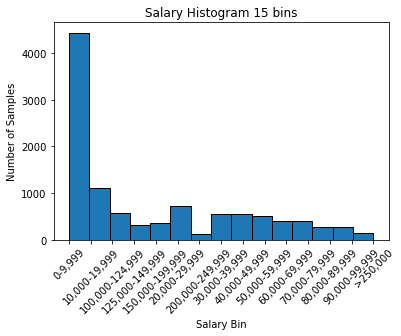

In [25]:
#visualize the distribution of salaries
histo_sal = Y.sort_values(by=['Q24_buckets'],ascending=True,axis=0,kind='mergesort')

%matplotlib inline
plt.hist(histo_sal, bins=15, edgecolor='black')
plt.title("Salary Histogram 15 bins")
plt.xlabel("Salary Bin")
plt.xticks(rotation=45)
plt.ylabel("Number of Samples")
plt.show()

In [26]:
#map catagorical labels to integers for correlation plot
sal_norm = {'0-9,999':5000,
            '10,000-19,999':15000,
            '20,000-29,999':25000,
            '30,000-39,999': 35000, 
            '40,000-49,999': 45000, 
            '50,000-59,999': 55000,
            '60,000-69,999': 65000,
            '70,000-79,999': 75000, 
            '80,000-89,999': 85000, 
            '90,000-99,999': 95000,
            '100,000-124,999':112500,
            '125,000-149,999':137500,
            '150,000-199,999':175000,
            '200,000-249,999':225000,
            '>250,000':25000}

In [27]:
#function to get correlatiojn plot of a question N1 from matrix X1 

targets1 = targets.copy(deep=True)
targets1 = targets1.rename(columns={'Q24_buckets':'z_salary_buckets'})
targets1.loc[0:,'z_salary_buckets'] = targets1.loc[0:,'z_salary_buckets'].map(sal_norm)

corr_arr = pd.concat([X,targets1],axis=1,join='inner')
names = corr_arr.columns
names = list(names)

#function to evaluate heatmaps
def corrmaps(N1,X1,stri,n):
    names = N1
    corr_arr = X1
    question = stri
    for i in range(len(names)):
        if names[i] == stri:    
            index = i
        
    #determine if single digit q
    if names[index][2] =='_':
        j = 0
        heater = corr_arr['z_salary_buckets']
        while names[index][0:3] == names[index+j][0:3]:

            holder = corr_arr[names[index+j]]
            heater = pd.concat([heater,holder],axis=1,join='inner')
            j += 1
        
    #determine is double digit q
    if names[index][3] =='_': 
        j = 0
        heater = corr_arr['z_salary_buckets']
        while names[index][0:4] == names[index+j][0:4]:
            
            holder = corr_arr[names[index+j]]
            heater = pd.concat([heater,holder],axis=1,join='inner')
            j += 1
    heater1 = heater.corr()
    h = np.array(heater1)
    h[0,0] = n
    h = h[0,:]
    h = h.reshape((h.shape[0],1))
    return h

In [28]:
h1 = corrmaps(names,corr_arr,'Q1_18-21',2)
print(h1)
print(h1[1:])
mm = np.mean(abs(h1[1:]))
mm

[[ 2.        ]
 [-0.13774205]
 [-0.21238095]
 [-0.15134378]
 [ 0.03243922]
 [ 0.08130227]
 [ 0.10771183]
 [ 0.12065632]
 [ 0.12231573]
 [ 0.09867217]
 [ 0.08975523]
 [ 0.03032933]]
[[-0.13774205]
 [-0.21238095]
 [-0.15134378]
 [ 0.03243922]
 [ 0.08130227]
 [ 0.10771183]
 [ 0.12065632]
 [ 0.12231573]
 [ 0.09867217]
 [ 0.08975523]
 [ 0.03032933]]


0.10769535315721046

In [29]:
list1= ['Q1_18-21','Q2_Man','Q3_Argentina','Q4_Bachelor’s degree','Q5_Business Analyst','Q6_1-2 years','Q7_Part_1_0','Q8_0.0','Q9_Part_1_0','Q10_Part_1_0','Q11_0.0','Q12_Part_1_0', 'Q13_0.0','Q14_Part_1_0', 'Q15_0.0','Q16_Part_1_0','Q17_Part_1_0','Q18_Part_1_0','Q19_Part_1_0','Q20_0-49 employees','Q21_0','Q22_I do not know','Q23_Part_1_0','Q24_$0-999','Q25_0.0','Q26_A_Part_1_0','Q27_A_Part_1_0','Q28_A_Part_1_0','Q29_A_Part_1_0','Q30_0.0','Q31_A_Part_1_0','Q32_0.0','Q33_A_Part_1_0','Q34_A_Part_1_0','Q35_A_Part_1_0', 'Q36_Part_1_0','Q37_Part_1_0','Q38_0.0','Q39_Part_1_0','Q26_B_Part_1_0','Q27_B_Part_1_0', 'Q28_B_Part_1_0','Q29_B_Part_1_0','Q31_B_Part_1_0','Q33_B_Part_1_0','Q34_B_Part_1_0','Q35_B_Part_1_0']


In [30]:
#print correlations of every question
l1 = 0
for y in list1: 
    column = corrmaps(names,corr_arr,y,l1)
    c = np.mean(abs(column[1:]))
    l1 += 1
    print('question:',y[0:5],':',c)
    

question: Q1_18 : 0.10769535315721046
question: Q2_Ma : 0.04260237998783073
question: Q3_Ar : 0.05619333127774344
question: Q4_Ba : 0.06397380092278031
question: Q5_Bu : 0.039008285354322124
question: Q6_1- : 0.13888409950132022
question: Q7_Pa : 0.05500482680032932
question: Q8_0. : 0.0298091670590372
question: Q9_Pa : 0.0402361976035338
question: Q10_P : 0.04581010465809754
question: Q11_0 : 0.10221455729108145
question: Q12_P : 0.05089737608535105
question: Q13_0 : 0.029908166168555513
question: Q14_P : 0.05454671104812431
question: Q15_0 : 0.06402069643309283
question: Q16_P : 0.046687971848248896
question: Q17_P : 0.05397451159878247
question: Q18_P : 0.020970113610333248
question: Q19_P : 0.03528831909710737
question: Q20_0 : 0.09349783877407913
question: Q21_0 : 0.0770409917292703
question: Q22_I : 0.10174136907347207
question: Q23_P : 0.11412662430954938
question: Q24_$ : 0.15789554551091062
question: Q25_0 : 0.20974612103598822
question: Q26_A : 0.047950655423203835
question: 

In [31]:
#arbitrary cutoff of average 0.04 correlation:
# dropping questions 5,8,19,31,35    

In [32]:
'Q8_0.0','Q8_1.0','Q13_0.0','Q13_1.0','Q25_0.0','Q25_1.0'

('Q8_0.0', 'Q8_1.0', 'Q13_0.0', 'Q13_1.0', 'Q25_0.0', 'Q25_1.0')

In [33]:
#drop low correlation questions
X = X.drop(columns=['Q5_Business Analyst',
 'Q5_DBA/Database Engineer',
 'Q5_Data Analyst',
 'Q5_Data Engineer',
 'Q5_Data Scientist',
 'Q5_Machine Learning Engineer',
 'Q5_Other',
 'Q5_Product/Project Manager',
 'Q5_Research Scientist',
 'Q5_Software Engineer',
 'Q5_Statistician',
 'Q8_0.0',
 'Q8_1.0',
 'Q19_Part_1_0',
 'Q19_Part_1_1',
 'Q19_Part_2_0',
 'Q19_Part_2_1',
 'Q19_Part_3_0',
 'Q19_Part_3_1',
 'Q19_Part_4_0',
 'Q19_Part_4_1',
 'Q19_Part_5_0',
 'Q19_Part_5_1',
 'Q19_OTHER_0',
 'Q19_OTHER_1',
 'Q31_A_Part_1_0',
 'Q31_A_Part_1_1',
 'Q31_A_Part_2_0',
 'Q31_A_Part_2_1',
 'Q31_A_Part_3_0',
 'Q31_A_Part_3_1',
 'Q31_A_Part_4_0',
 'Q31_A_Part_4_1',
 'Q31_A_Part_5_0',
 'Q31_A_Part_5_1',
 'Q31_A_Part_6_0',
 'Q31_A_Part_6_1',
 'Q31_A_Part_7_0',
 'Q31_A_Part_7_1',
 'Q31_A_Part_8_0',
 'Q31_A_Part_8_1',
 'Q31_A_Part_9_0',
 'Q31_A_Part_9_1',
 'Q31_A_Part_10_0',
 'Q31_A_Part_10_1',
 'Q31_A_Part_11_0',
 'Q31_A_Part_11_1',
 'Q31_A_Part_12_0',
 'Q31_A_Part_12_1',
 'Q31_A_Part_13_0',
 'Q31_A_Part_13_1',
 'Q31_A_Part_14_0',
 'Q31_A_Part_14_1',
 'Q31_A_OTHER_0',
 'Q31_A_OTHER_1',
 'Q35_A_Part_1_0',
 'Q35_A_Part_1_1',
 'Q35_A_Part_2_0',
 'Q35_A_Part_2_1',
 'Q35_A_Part_3_0',
 'Q35_A_Part_3_1',
 'Q35_A_Part_4_0',
 'Q35_A_Part_4_1',
 'Q35_A_Part_5_0',
 'Q35_A_Part_5_1',
 'Q35_A_Part_6_0',
 'Q35_A_Part_6_1',
 'Q35_A_Part_7_0',
 'Q35_A_Part_7_1',
 'Q35_A_Part_8_0',
 'Q35_A_Part_8_1',
 'Q35_A_Part_9_0',
 'Q35_A_Part_9_1',
 'Q35_A_Part_10_0',
 'Q35_A_Part_10_1',
 'Q35_A_OTHER_0',
 'Q35_A_OTHER_1',])

In [34]:
from sklearn.decomposition import PCA

In [35]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
X

In [36]:
# Part 3 - Model implementation

In [66]:
import mord as m

In [39]:
#taken from MIE1624 tutorial

#set up cross validation

def run_kfold(model,X1,Y1):
    
    Y1 = pd.DataFrame(Y1)
    X = X1
    Y = Y1
    
    kf = KFold(n_splits=10) #n_splits previously n_folds
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
        model.fit(X_train, Y_train)
        #predictions = model.predict(X_test)
        
        #yhat = model.predict(X_test)
        #test = yhat==Y_test
        #acc = sum(test)/test.shape[0]
        acc = model.score(X_test,Y_test)
        accuracy = acc# can try mean absolute error instead
        #print(acc.shape)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean_outcome = np.mean(outcomes)
    std_outcome=np.std(outcomes)
    print("Mean accuracy: {0}".format(mean_outcome)) 
    print("Standard Deviation: {0}".format(std_outcome)) 
    
    return mean_outcome,std_outcome

In [40]:
#next couple of lines are just testing different C values

In [41]:
from sklearn import preprocessing

In [42]:
le = preprocessing.LabelEncoder()
le.fit(np.ravel(Y))
le.classes_
Y_bin = np.ravel(le.transform(Y))
X_train, X_test, y_train, y_test = train_test_split(X,Y_bin, test_size=0.15, random_state=1)

/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [67]:
clf = m.LogisticAT()
clf.fit(X_train,y_train)

KeyboardInterrupt: 

In [44]:
x = clf.score(X_test,y_test)
x

-0.002484472049689441

In [ ]:
#perform parametric sweep of alpha values for question 4/5

In [47]:
clf = m.LogisticIT(alpha=1)
m1,s1 = run_kfold(clf,X,Y_bin)

/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 1 accuracy: 0.983224603914259


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 2 accuracy: 0.9878844361602982


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 3 accuracy: 0.9888164026095061


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 4 accuracy: 0.983224603914259


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 5 accuracy: 0.983224603914259


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 6 accuracy: 0.9869524697110904


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 7 accuracy: 0.97856477166822


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 8 accuracy: 0.9897483690587139


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 9 accuracy: 0.9860205032618826


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 10 accuracy: 0.9944029850746269
Mean accuracy: 0.9862063749287115
Standard Deviation: 0.004183496809273633


In [48]:
clf2 = m.LogisticIT(alpha=0.5)
m2,s2 = run_kfold(clf2,X,Y_bin)

/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 1 accuracy: 0.9906803355079217


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 2 accuracy: 0.9897483690587139


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 3 accuracy: 0.9916123019571296


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 4 accuracy: 0.9888164026095061


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 5 accuracy: 0.9878844361602982


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 6 accuracy: 0.9897483690587139


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 7 accuracy: 0.9804287045666356


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 8 accuracy: 0.9906803355079217


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 9 accuracy: 0.9888164026095061


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 10 accuracy: 0.9944029850746269
Mean accuracy: 0.9892818642110974
Standard Deviation: 0.0034171342718920276


In [49]:
clf3 = m.LogisticIT(alpha=3)
m3,s3 = run_kfold(clf3,X,Y_bin)

/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 1 accuracy: 0.8872320596458527


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 2 accuracy: 0.9049394221808015


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 3 accuracy: 0.9105312208760484


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 4 accuracy: 0.9142590866728798


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 5 accuracy: 0.8956197576887233


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 6 accuracy: 0.8993476234855545


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 7 accuracy: 0.8937558247903076


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 8 accuracy: 0.9040074557315937


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 9 accuracy: 0.8937558247903076


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 10 accuracy: 0.9095149253731343
Mean accuracy: 0.9012963201235203
Standard Deviation: 0.008300764855381742


In [50]:
clf4 = m.LogisticIT(alpha=6)
m4,s4 = run_kfold(clf4,X,Y_bin)

/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 1 accuracy: 0.8080149114631874


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 2 accuracy: 0.8406337371854613


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 3 accuracy: 0.804287045666356


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 4 accuracy: 0.8350419384902144


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 5 accuracy: 0.8191985088536813


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 6 accuracy: 0.8219944082013048


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 7 accuracy: 0.8266542404473439


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 8 accuracy: 0.8285181733457595


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 9 accuracy: 0.8080149114631874


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fold 10 accuracy: 0.8218283582089553
Mean accuracy: 0.8214186233325451
Standard Deviation: 0.01136164103243062


In [51]:
#scaling/normalization not needed since models are performing at >99% accuracy on test sets without it.

In [52]:
from sklearn.model_selection import learning_curve
#from sklearn.model_selection.learning_curve import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

In [53]:
#even the worst performing model clearly has little bias and 
#variance so the question comes down to which model is the
#most accurate and that is the C=10 model 

In [54]:
#Part 4 - Model Tuning

In [55]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [56]:
yhat = clf.predict(X_test)
x1 = precision_score(y_test, yhat, average='macro')
x2 = f1_score(y_test, yhat, average='macro')
print(x1,x2)

0.9203888509151668 0.9257804721789838


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
yhat = clf2.predict(X_test)
x1 = precision_score(y_test, yhat, average='macro')
x2 = f1_score(y_test, yhat, average='macro')
print(x1,x2)

0.9215584415584416 0.9271736555318645


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
yhat = clf3.predict(X_test)
x1 = precision_score(y_test, yhat, average='macro')
x2 = f1_score(y_test, yhat, average='macro')
print(x1,x2)

0.7127790164701765 0.704187766951246


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
yhat = clf4.predict(X_test)
x1 = precision_score(y_test, yhat, average='macro')
x2 = f1_score(y_test, yhat, average='macro')
print(x1,x2)

0.5658251966620405 0.5499548685956099


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#part 5 - Testing and Discussion

In [61]:
#predict on test/train set
test_predictions = clf2.predict(X_test)
train_predictions = clf2.predict(X_train)

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
#get labels
labels=clf2.classes_
print(labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


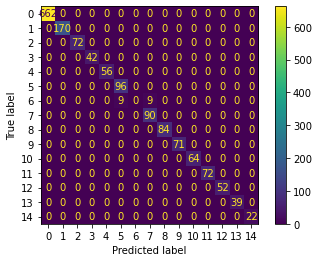

In [64]:
#plot confusion matrix of test set
cm = confusion_matrix(y_test, test_predictions, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

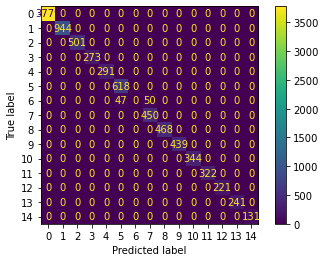

In [65]:
#plot confusion matrix of train set
cm = confusion_matrix(y_train, train_predictions, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()